<a href="https://colab.research.google.com/github/ValentineAlibert/Data-physics/blob/master/Week4_final%20version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 4 new version**

# **Introduction**

In this week's practical, we will investigate the matter/anti-matter assymetry problem.


The Big Bang should have created equal amounts of matter and antimatter in the early universe (because they have the mass and produced in equal quantities). But today, everything we see is made almost entirely of matter. But there is not much antimatter to be found. One of the greatest challenges in physics is to figure out what happened to the antimatter, or why we see an asymmetry between matter and antimatter. Today we will see why there are not balanced and we will look at the decay of the particles.

We will work with the LHCb data and with particles named: B+ meson and it's antiparticle the B- meson. But th problem is taht we can't detect them diectly so we have to collect data on the decay of their product, their daughter particles.



In [0]:
#direcotry and download the root form cern
!mkdir -p APPS
!cd APPS && wget https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
!cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz

--2020-03-06 10:43:13--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.13.143, 2001:1458:201:45::100:b
Connecting to root.cern.ch (root.cern.ch)|137.138.13.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.1’

root_v6.13.08.Linux 100%[===================>] 131.05M  25.6MB/s    in 5.8s    

2020-03-06 10:43:19 (22.5 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.1’ saved [137415272/137415272]



In [0]:
#now we can extract some files from ROOT and ensure that we can access the libraries. We use some python key words to get access to the right files:

import sys

sys.path.append("/content/APPS/root/lib")

import ctypes

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')

#ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMinuit.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libFoam.so')

<CDLL '/content/APPS/root/lib/libFoam.so', handle 560bcc1a6f00 at 7fca34373250>

Warning in <TROOT::Append>: Replacing existing TH1: gauss (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


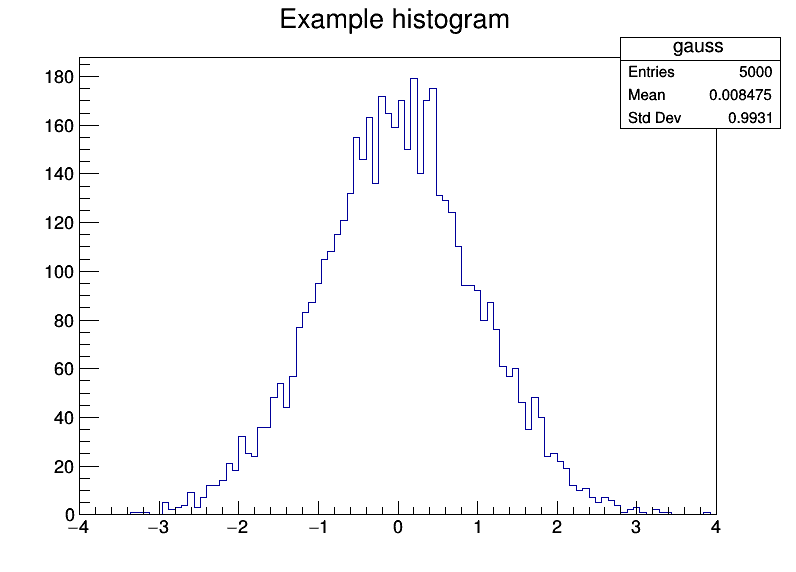

In [0]:
#Now we can check if we have everything working as we expect: 
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()

In [0]:
!mkdir -p DATA && cd DATA  && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root


--2020-03-06 10:45:25--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root
Resolving opendata.cern.ch (opendata.cern.ch)... 188.184.28.138, 188.185.82.144, 188.184.93.89, ...
Connecting to opendata.cern.ch (opendata.cern.ch)|188.184.28.138|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444723234 (424M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetUp.root’

B2HHH_MagnetUp.root 100%[===================>] 424.12M  24.6MB/s    in 17s     

2020-03-06 10:45:43 (24.3 MB/s) - ‘B2HHH_MagnetUp.root’ saved [444723234/444723234]



Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


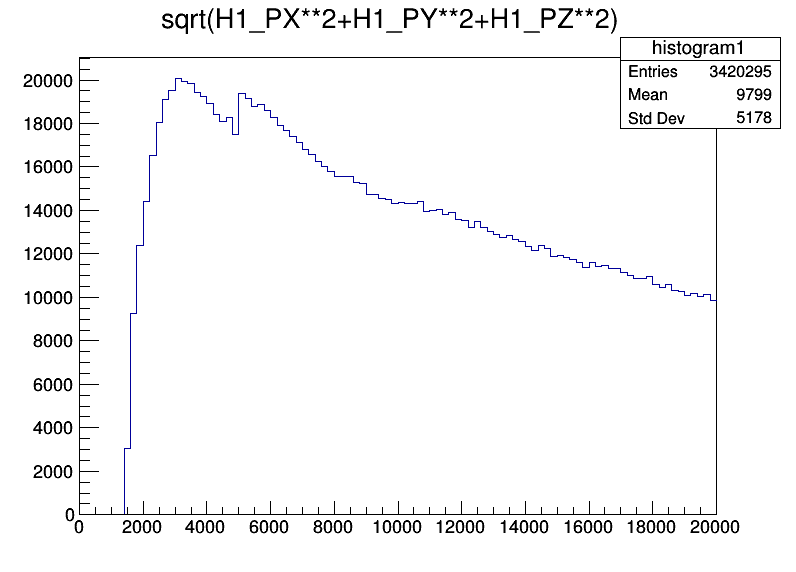

In [0]:
#Since we need to use ROOT, we must first import this into Python:
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')
import ROOT
#Then we open the ROOT file using the TFile command.
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
# Now we create a canvas, plot our data onto the canvas and draw it:

c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#This string (below) is the total momentum of the H1 particle
tree.Draw("sqrt(H1_PX**2+H1_PY**2+H1_PZ**2)>>histogram1(100,0,20000)")
#tree.Draw("sqrt((H1_PX**2)+(H1_PY**2)+(H1_PZ**2))+>>histogram1,100")
histogram1 = ROOT.gDirectory.Get("histogram1")
#histogram1.Draw()
#Show me the canvas
c.Draw()

In [0]:
###We need to tell Python what the total momentum is defined as mathematically - do that in this code block:
from numpy import *
import numpy as np
from math import *

#Hint: I suggest we define a function which we might want to use later - something like:


def p_tot_daughter(daughter):
  p_tot = "sqrt(("+daughter +"_PX)**2 + ("+daughter +"_PY)**2 + ("+daughter +"_PZ)**2)"
  return p_tot
 

p_tot_daughter("H1")




p_tot_daughter('H2')

'sqrt((H2_PX)**2 + (H2_PY)**2 + (H2_PZ)**2)'

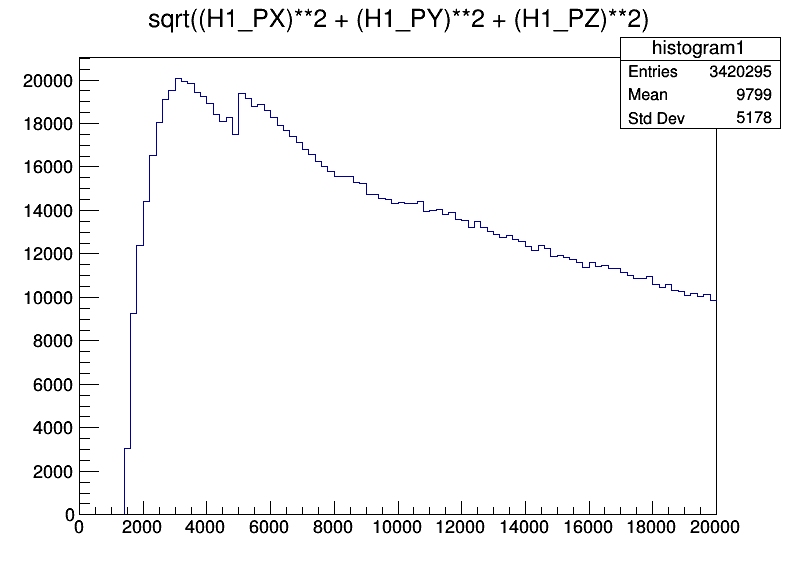

In [0]:
#defining the 3 particles for after 
p1 = "H1"
p2 = "H2"
p3 = "H3"

f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")

tree=f.Get("DecayTree")

#H1 histogram
c1 = ROOT.TCanvas("Momentums of particles","Momentum",800,600)
tree.Draw(p_tot_daughter(p1)+">>histogram1(100,0,20000)")
histogram1 = ROOT.gDirectory.Get("histogram1")
c1.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Momentums of particles


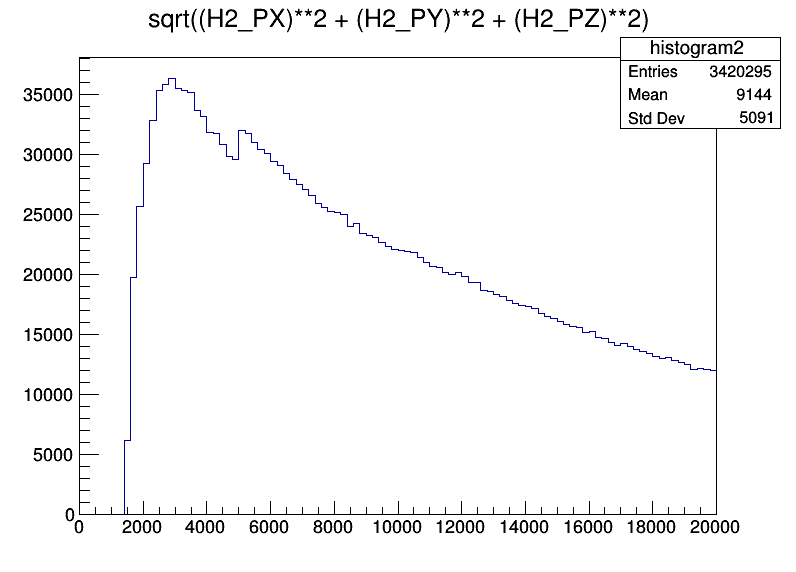

In [0]:
#H2 histogram
c2 = ROOT.TCanvas("Momentums of particles","Momentum",800,600)
tree.Draw(p_tot_daughter(p2)+">>histogram2(100,0,20000)")
histogram2 = ROOT.gDirectory.Get("histogram2")
c2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Momentums of particles


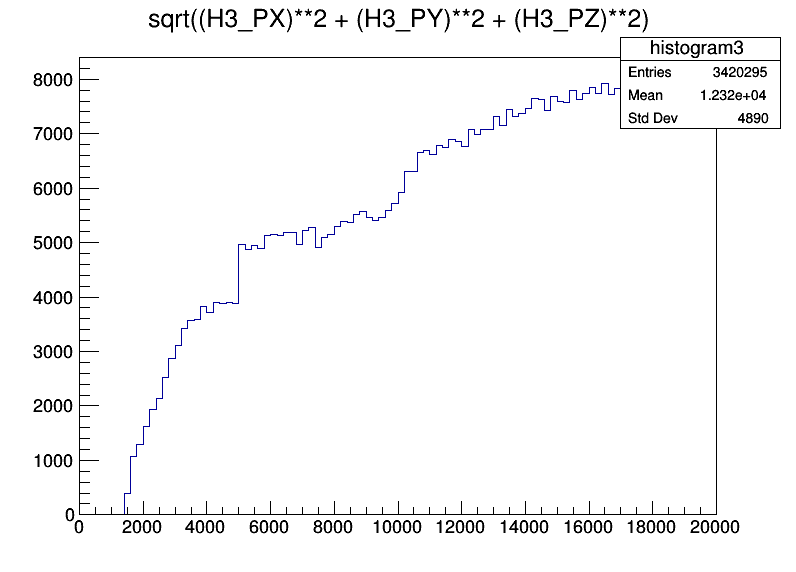

In [0]:
#H3 histogram
c3 = ROOT.TCanvas("Momentums of particles","Momentum",800,600)
tree.Draw(p_tot_daughter(p3)+">>histogram3(100,0,20000)")
histogram3 = ROOT.gDirectory.Get("histogram3")
c3.Draw()

# **Energy calculation** - part 2

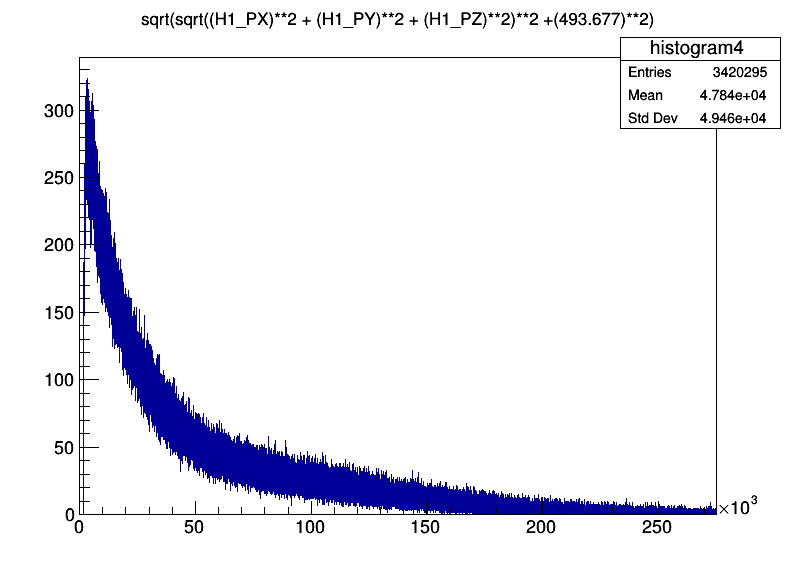

In [0]:
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")

tree=f.Get("DecayTree")

c = 299792458     # m/s
mkaon = 493.677   #meV/c^2

                      
def ekaon (p1):
  ekaon = "sqrt("+p_tot_daughter(p1)+"**2 +("+str(mkaon)+")**2)"       # (meV/c)
  return ekaon

############draw energy graph for p1
e1 = ROOT.TCanvas("Energy","Energy",800,600)
tree.Draw(ekaon(p1)+">>histogram4(100000,0,275000)")
histogram4 = ROOT.gDirectory.Get("histogram4")
e1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Energy


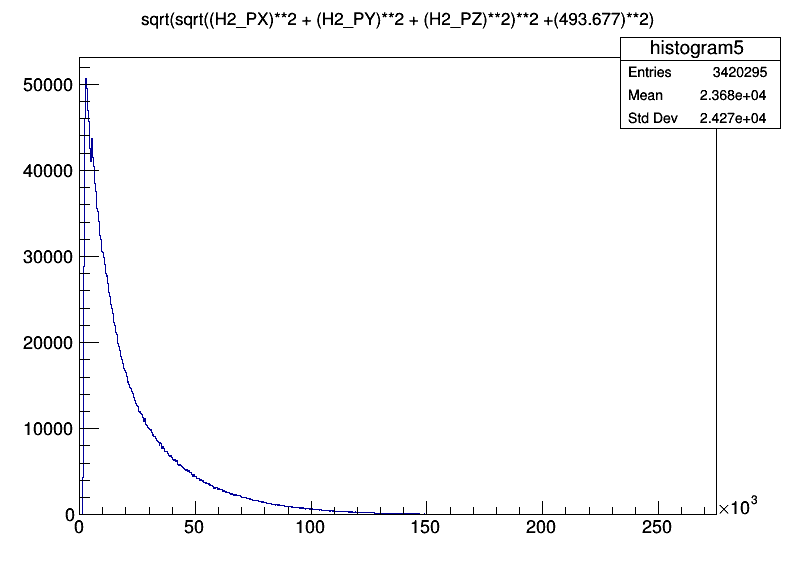

In [0]:
#draw energy graph for p2
e2 = ROOT.TCanvas("Energy","Energy",800,600)
tree.Draw(ekaon(p2)+">>histogram5(1000,0,275000)")
histogram5 = ROOT.gDirectory.Get("histogram5")
e2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Energy


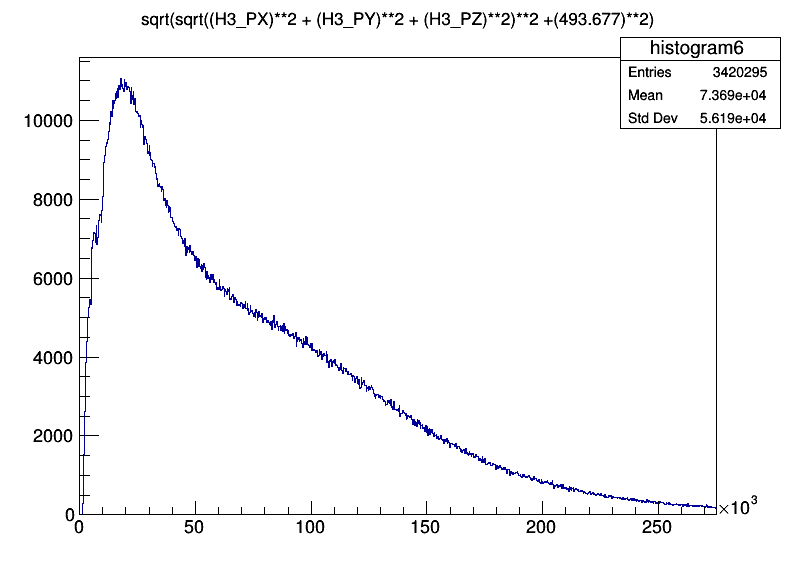

In [0]:
#draw energy graph for p3
e3 = ROOT.TCanvas("Energy","Energy",800,600)
tree.Draw(ekaon(p3)+">>histogram6(1000,0,275000)")
histogram6 = ROOT.gDirectory.Get("histogram6")
e3.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Energy


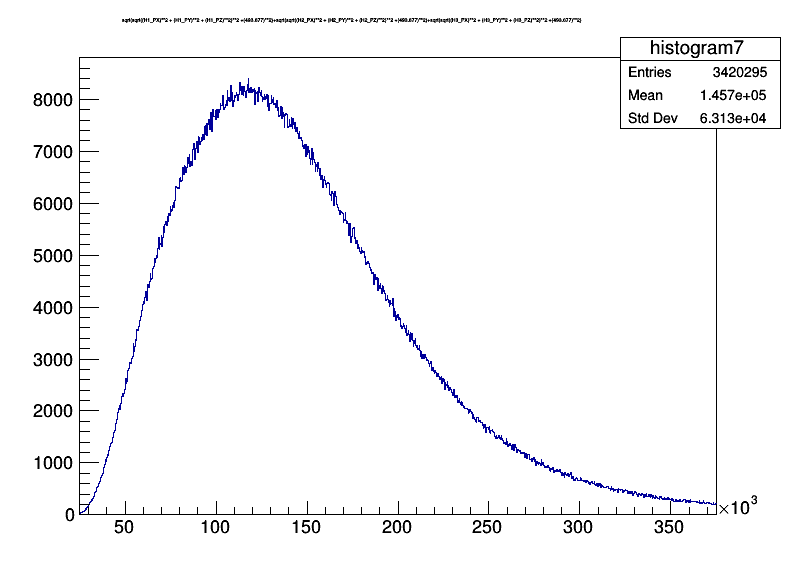

In [0]:
# energy of the B meson, using the conservation of energy - just combine the energies to give a total energy

#total energy 

etot = ROOT.TCanvas("Energy","Energy",800,600)
tree.Draw((ekaon(p1)+"+"+ekaon(p2)+"+"+ekaon(p3))+">>histogram7(1000,25000,375000)")
histogram7 = ROOT.gDirectory.Get("histogram7")
etot.Draw()

sqrt((H1_PX + H2_PX + H3_PX)**2 +(H1_PY + H2_PY + H3_PY)**2 + (H1_PZ + H2_PZ + H3_PZ)**2)


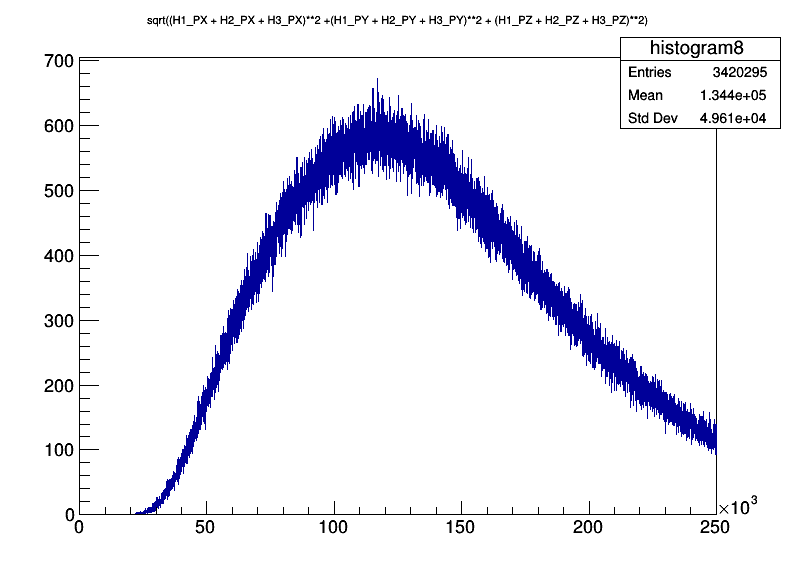

In [0]:

#momentum

# momentum of the B meson. To do this, you need to first combine all the x momenta of the daughters,
#to get a total x momentum of the mother; then you can combine your three momenta into total momentum


x_momentum_b = "H1_PX + H2_PX + H3_PX"
y_momentum_b = "H1_PY + H2_PY + H3_PY"
z_momentum_b = "H1_PZ + H2_PZ + H3_PZ"
tot_momentum_b = "sqrt(("+x_momentum_b+")**2 +("+y_momentum_b+")**2 + ("+z_momentum_b+")**2)"
print (tot_momentum_b)

totmomentumb = ROOT.TCanvas("momentum","momemtum",800,600)
tree.Draw((tot_momentum_b)+">>histogram8(10000,0,250000)")
histogram8 = ROOT.gDirectory.Get("histogram8")
totmomentumb.Draw()

# **experimental mass**

for this part of the assignment we have to fint the  experimental mass, and not the theoretical mass, used earlier for the Kaon calculations. We will get a distribution of the masses, because of the error measurments. We hope to get a narrow peak


sqrt((H1_PX)**2+(H1_PY)**2+(H1_PZ)**2)


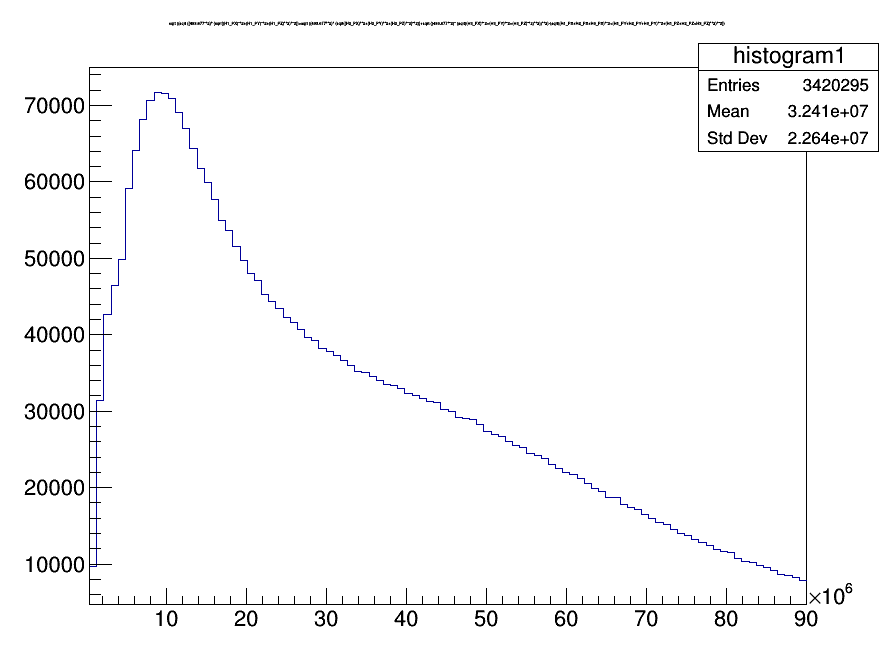

In [0]:
#Use the energy of the B meson and momentum of the B meson as inputs and
#calculate the mass of the B meson (Found by analysis of the daughter products)
#Now plot a histogram of the range of masses of the B meson.
#Does this match what we would expect from theory?

#raquel explained me how to di it with her code, i don't know why it didn't work with mine but i do understand the process!
def p_tot_daughter(daughter):
  p_tot = "sqrt(("+daughter+"_PX)**2+("+daughter+"_PY)**2+("+daughter+"_PZ)**2)"
  return p_tot

#for each of the 3 daughters, the H1 p 
pTOT_H1 = p_tot_daughter("H1")
pTOT_H2 = p_tot_daughter("H2")
pTOT_H3 = p_tot_daughter("H3")
print (pTOT_H1)

def get_energy(pTOT):
  energy = "sqrt ((493.677**2)* ("+pTOT+"**2))" 
  return energy

E1 = get_energy(pTOT_H1)
E2 = get_energy(pTOT_H2)
E3 = get_energy(pTOT_H3)

def get_ETOT(E1, E2, E3):
  ETOT = E1 + "+" + E2 + "+" + E3
  return ETOT

E_T = get_ETOT(E1, E2, E3)


def p_totx(daughter0, daughter1, daughter2):
  px_tot=daughter0+"_PX+"+daughter1+"_PX+"+daughter2+"_PX"
  return px_tot

def p_toty(daughter0, daughter1, daughter2):
  py_tot=daughter0+"_PY+"+daughter1+"_PY+"+daughter2+"_PY"
  return py_tot

def p_totz(daughter0, daughter1, daughter2):
  pz_tot=daughter0+"_PZ+"+daughter1+"_PZ+"+daughter2+"_PZ"
  return pz_tot

PX_TOT=p_totx("H1","H2","H3")
PY_TOT=p_toty("H1","H2","H3")
PZ_TOT=p_totz("H1","H2","H3")

def p_total(x,y,z):
  tot="sqrt(("+x+")**2+("+y+")**2+("+z+")**2)"
  return tot

PTOT_B = p_total(PX_TOT, PY_TOT, PZ_TOT)


def p_tot_daughter(daughter):
  p_tot = "sqrt(("+daughter +"_PX)**2 + ("+daughter +"_PY)**2 + ("+daughter +"_PZ)**2)"
  return p_tot

def mass (p, e):
  m = "sqrt (("+e+"**2)-("+p+"**2))"
  return m


mass_B = mass(PTOT_B, E_T)

m = ROOT.TCanvas("MASS","The Canvas Title",900,700)
#This string (below) is the total momentum of the H1 particle
tree.Draw(mass_B+">>histogram1(100,430000,90000000)") #we want 5200 ish 
histogram1 = ROOT.gDirectory.Get("histogram1")
#Show me the canvas
m.Draw()

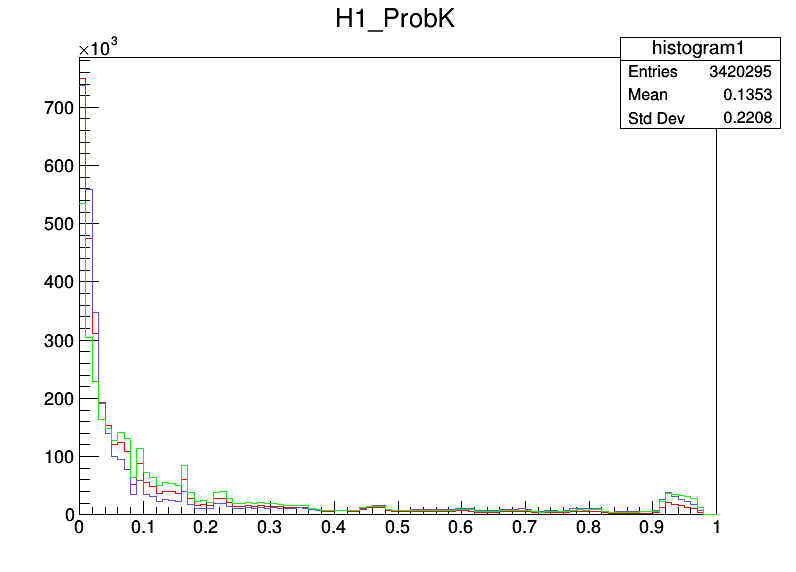

In [0]:
#plots of H1/H2/H3 _ProbK on one plot

c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#This string (below) is the total momentum of the H1 particle
tree.Draw("H1_ProbK>>histogram1(100,0,1)")
tree.Draw("H2_ProbK>>histogram2(100,0,1)")
tree.Draw("H3_ProbK>>histogram3(100,0,1)")
histogram1 = ROOT.gDirectory.Get("histogram1")
histogram2 = ROOT.gDirectory.Get("histogram2")
histogram3 = ROOT.gDirectory.Get("histogram3")
histogram1.SetLineColor(2) #red
histogram2.SetLineColor(9)
histogram3.SetLineColor(3) #green
histogram1.Draw()
histogram2.Draw("same")
histogram3.Draw("same")
#Show me the canvas
c.Draw()

#Analyze of Raquel
#probaility is more in 0, of all H1 being a Kaon,
#below 10% almost none
#small lump at end at 1! 
#mean probability 14% of being Kaon
#masses are wrong because we are looking at masses of a lot of different parrticles not alony Kaon, only 15% of masses we were looking at were KAONS

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


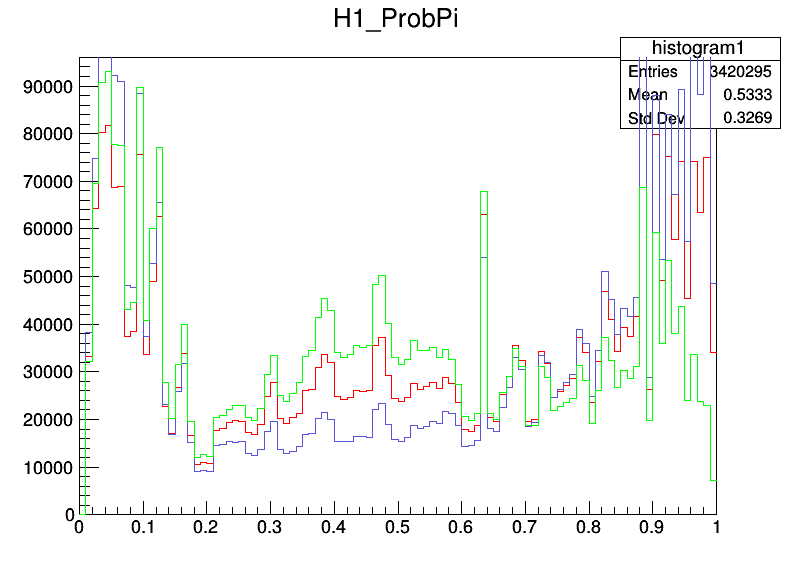

In [0]:
#plots of H1/H2/H3 _ProbPi in 1 plot

c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#This string (below) is the total momentum of the H1 particle
tree.Draw("H1_ProbPi>>histogram1(100,0,1)")
tree.Draw("H2_ProbPi>>histogram2(100,0,1)")
tree.Draw("H3_ProbPi>>histogram3(100,0,1)")
histogram1 = ROOT.gDirectory.Get("histogram1")
histogram2 = ROOT.gDirectory.Get("histogram2")
histogram3 = ROOT.gDirectory.Get("histogram3")
histogram1.SetLineColor(2) #red
histogram2.SetLineColor(9)
histogram3.SetLineColor(3) #green
histogram1.Draw()
histogram2.Draw("same")
histogram3.Draw("same")
#Show me the canvas
c.Draw()




### **Analysis**

# We can observe on the diagram that it is a "W" shape whih means that there is more probability to know if it is a pion, or if it not at all , but when it is halfway, it hard to determined. 50 ish % are Pions and easier to distinguish them compared to Kaons. 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


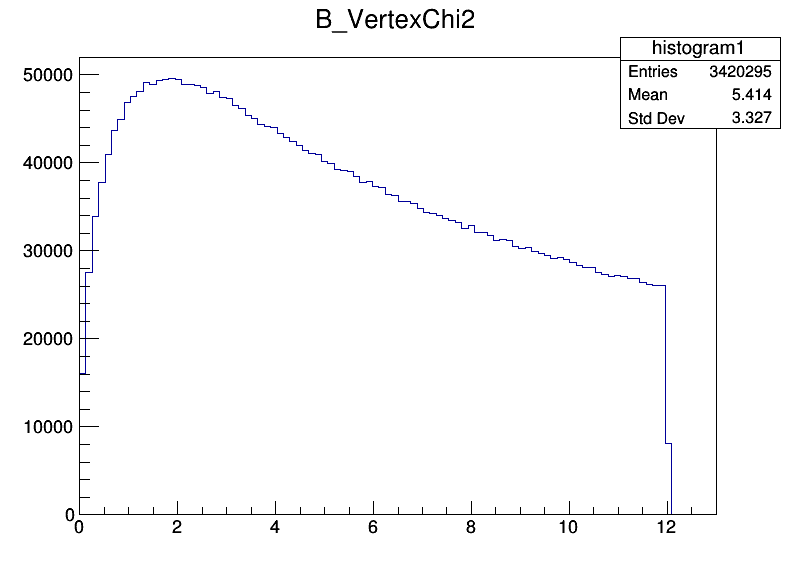

In [0]:
#plot of the B_VertexChi2
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#This string (below) is the total momentum of the H1 particle
tree.Draw("B_VertexChi2>>histogram1(100,0,13)")
histogram1 = ROOT.gDirectory.Get("histogram1")
c.Draw()

In [0]:
selection=("H1_ProbPi<0.2&H2_ProbPi<0.2&H3_ProbPi<0.2&!H1_isMuon&!H2_isMuon&!H3_isMuon&H3_ProbK>0.85&H2_ProbK>0.85&H1_ProbK>0.85&B_VertexChi2<2")

CutTree=tree.CopyTree(selection)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: MASS


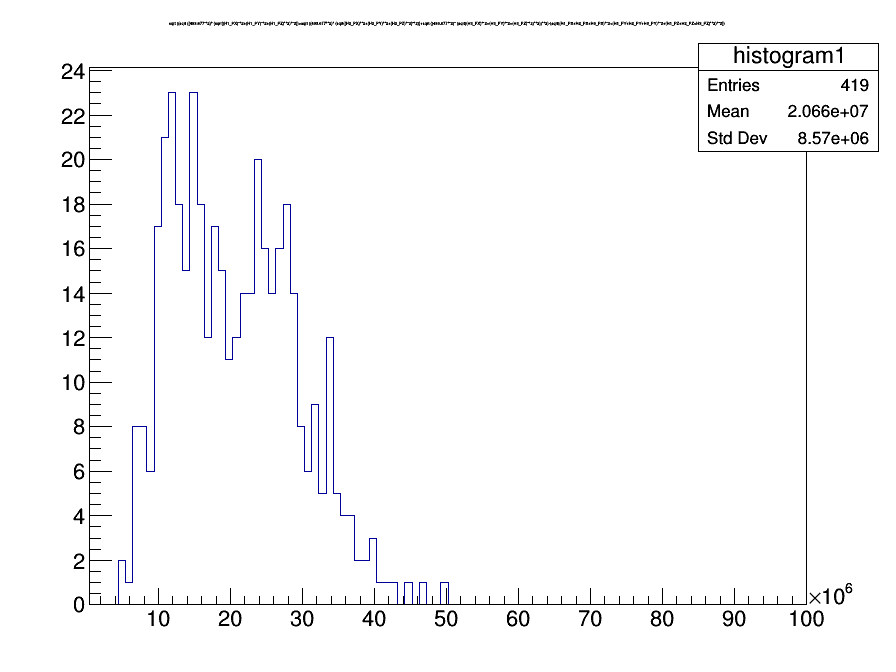

In [0]:
# plot the B meson mass, from both the tree and the CutTree

m = ROOT.TCanvas("MASS","The Canvas Title",900,700)
#This string (below) is the total momentum of the H1 particle
CutTree.Draw(mass_B+">>histogram1(100,430000,100000000)") #we want 5200 ish 
histogram1 = ROOT.gDirectory.Get("histogram1")
#Show me the canvas
m.Draw()
  
#the mass is not accurate